# Lista 10 - Aprendizado de Máquina

## Aluno: Ruan Felipe de Almeida Silva - 397048

In [385]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [386]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble


import warnings
warnings.filterwarnings('ignore')

### Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database". 


#### Importação dos dados.

In [387]:
# dataframe = pd.read_csv('diabetes.csv', delimiter=',')
dataframe = pd.read_csv('/content/drive/MyDrive/ufc - ec/Aprend_Maquina/datasets/diabetes.csv', delimiter=',')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Verificando os tipos de dados do dataset.



In [388]:
dataframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Verificando se existem valores faltantes no conjunto de dados.

In [389]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Dividindo o dataset nas features e no target e verificando os valores de target desse dataset.

In [390]:
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']
np.unique(y)

array([0, 1])

#### Exibindo a quantidade de amostras existente em cada classe.

In [391]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 1. Separe os dados em treino (80%) e teste (20%).

In [392]:
X_values = X.values
y_values = y.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=742, stratify=y_values)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 614
Conjunto x de teste: 154
Conjunto y de treino: 614
Conjunto y de teste: 154


### 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:

In [393]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### 1. Mostre a importância das features.

In [394]:
importances = dt.feature_importances_
importances

array([0.09177047, 0.27047085, 0.08006235, 0.04229144, 0.06500305,
       0.17720561, 0.12129161, 0.15190462])

In [395]:
columns = X.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

#### Montando um dataframe com as importâncias das features nesse modelo.

In [396]:
df_importances = pd.DataFrame({
    'Importances': importances 
})
df_importances.index = columns
df_importances.sort_values(by='Importances', ascending=False)

,Importances
Glucose,0.270471
BMI,0.177206
Age,0.151905
DiabetesPedigreeFunction,0.121292
Pregnancies,0.091770
BloodPressure,0.080062
Insulin,0.065003
SkinThickness,0.042291


#### Apresentando a importância das features em um gráfico de barras.

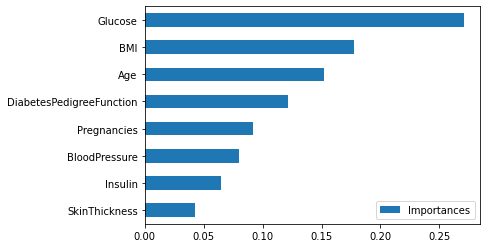

In [397]:
df_importances.sort_values(by='Importances').plot(kind='barh');

#### 2. Desenhe a árvore de decisão.

[Text(151.5721153846154, 211.04470588235293, 'X[1] <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(67.2014423076923, 198.25411764705882, 'X[7] <= 28.5\ngini = 0.321\nsamples = 394\nvalue = [315, 79]'),
 Text(28.43653846153846, 185.4635294117647, 'X[5] <= 30.95\ngini = 0.153\nsamples = 216\nvalue = [198, 18]'),
 Text(12.876923076923077, 172.6729411764706, 'X[0] <= 7.5\ngini = 0.032\nsamples = 123\nvalue = [121, 2]'),
 Text(8.584615384615384, 159.88235294117646, 'X[6] <= 0.672\ngini = 0.016\nsamples = 122\nvalue = [121, 1]'),
 Text(4.292307692307692, 147.09176470588235, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(12.876923076923077, 147.09176470588235, 'X[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(8.584615384615384, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17.16923076923077, 134.30117647058825, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(17.16923076923077, 159.88235294117646, 'gini = 0.0\nsamples = 1

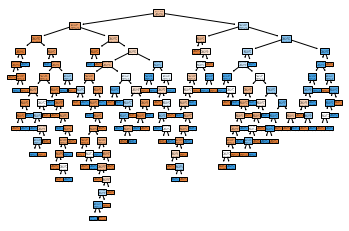

In [398]:
tree.plot_tree(dt, filled=True)

#### 3. Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

In [399]:
y_pred_train = dt.predict(X_train)
f1score_train = metrics.f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
y_pred_test = dt.predict(X_test)
f1score_test = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
print(f'F1-Score dos dados de treino: {f1score_train}')
print(f'F1-Score dos dados de teste: {f1score_test}')

F1-Score dos dados de treino: 1.0
F1-Score dos dados de teste: 0.7232230932973366


### 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no seguinte documento, mas não precisa usar k-Fold Cross Validation.

#### Criando os modelos: kNN, Logistic Regression, Decision Tree, SVC e Naive Bayes. Adicionando os modelos criados em uma lista.

In [400]:
knn = KNeighborsClassifier(n_neighbors=24, metric='manhattan');
lr = LogisticRegression(penalty='l2', C=0.1, random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
svc = svm.SVC(random_state=42, C=10, kernel='rbf')
nb = naive_bayes.GaussianNB()

clf_models = [knn, lr, dt, svc, nb]
clf_labels = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVC', 'Naive Bayes']

#### Treinando os modelos criados e observando a métrica f1-score atingida por cada um ao aplicar os dados de teste.

In [401]:
estimators = []
results = []


for model, label in zip(clf_models, clf_labels):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f'F1-Score: {f1score} - Model: {label}')
    print("--------------------------------------------------\n")

    estimator = (label, model)
    estimators.append(estimator)
    results.append({'Model': label, 'F1-Score': f1score})

F1-Score: 0.7387584892172047 - Model: KNN
--------------------------------------------------

F1-Score: 0.7878921078921078 - Model: Logistic Regression
--------------------------------------------------

F1-Score: 0.7232230932973366 - Model: Decision Tree
--------------------------------------------------

F1-Score: 0.762326945372707 - Model: SVC
--------------------------------------------------

F1-Score: 0.7852459996413127 - Model: Naive Bayes
--------------------------------------------------



#### Criando o modelo de ensemble Voting Classifier, utilizando os modelos anteriores. 

#### Treina-se o modelo criado e verifica-se o f1-score atingido por esse novo modelo. 

In [402]:
vc = ensemble.VotingClassifier(estimators=estimators)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
label = 'Voting Classifier' 
print(f'F1-Score: {f1score} - Model: {label}')
print("--------------------------------------------------\n")

results.append({'Model': label, 'F1-Score': f1score})

F1-Score: 0.7910711477798209 - Model: Voting Classifier
--------------------------------------------------



#### Criando um dataframe para analisar o F1-Score alcançado por cada modelo empregado.

In [403]:
df_models = pd.DataFrame(results)
df_models_ord = df_models.sort_values(by='F1-Score', ascending=False)
df_models_ord

,Model,F1-Score
5,Voting Classifier,0.791071
1,Logistic Regression,0.787892
4,Naive Bayes,0.785246
3,SVC,0.762327
0,KNN,0.738758
2,Decision Tree,0.723223


#### Montando um gráfico de barras para analisar a metrica F1-Score que foi conseguida em cada modelo.

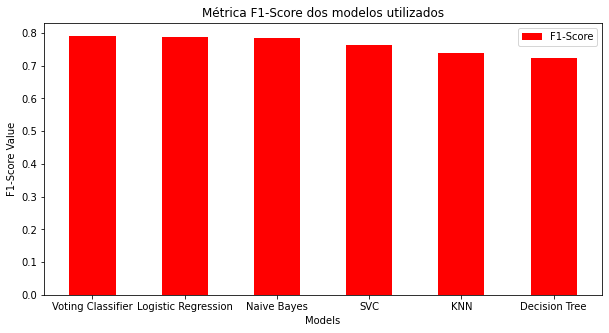

In [404]:
plt.figure(figsize = (10, 5))

barWidth = 0.5

p1 = np.arange(df_models.shape[0])


plt.bar(p1, df_models_ord['F1-Score'], color='red', width=barWidth, label='F1-Score')
plt.legend()
plt.xlabel('Models')
plt.ylabel('F1-Score Value')
plt.title('Métrica F1-Score dos modelos utilizados')
plt.xticks(p1, df_models_ord['Model'])
plt.show()

### 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se basear no seguinte documento.

#### Criando os modelos: Decision Tree, Random Forest, Ada Boost, Gradient Boosting e Bagging.

#### Todos os modelos são adicionados a uma lista, para que possam ser percorridos posteriormente.


In [405]:
dt = tree.DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=1,
                                  min_samples_leaf=7)
rf = ensemble.RandomForestClassifier(random_state=42, n_estimators=400, criterion='gini',
                                    max_depth=10, min_samples_leaf=30)
ab = ensemble.AdaBoostClassifier(random_state=42, n_estimators=400, learning_rate=0.01, base_estimator=dt)
gb = ensemble.GradientBoostingClassifier(random_state=42, n_estimators=300, learning_rate=0.01, 
                                         max_depth=5, min_samples_leaf=20)
bc = ensemble.BaggingClassifier(random_state=42, base_estimator=dt, n_estimators=200, oob_score=True, 
                                bootstrap=True)

models = [dt, rf, ab, gb, bc]
labels = ['Decision Tree', 'Random Forest', 'Ada Boost', 'Gardient Boosting', 'Bagging Classifier']

#### Treinando os modelos criados e observando a métrica f1-score atingida por cada um ao aplicar os dados de teste. 

In [406]:
results = []
features_importances = []

for model, label in zip(models, labels):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    if label != 'Bagging Classifier':
       importances = model.feature_importances_
    else:
        importances = '-'
    
    print(f'Model: {label}')
    print(f'F1-Score: {f1score}')
    print("--------------------------------------------------\n")

    results.append({'Model': label, 'F1-Score': f1score})
    features_importances.append({'Model': label, 'Features Importances': importances})

Model: Decision Tree
F1-Score: 0.7505269599510437
--------------------------------------------------

Model: Random Forest
F1-Score: 0.7925345773589287
--------------------------------------------------

Model: Ada Boost
F1-Score: 0.7938855402970236
--------------------------------------------------

Model: Gardient Boosting
F1-Score: 0.7902489667195549
--------------------------------------------------

Model: Bagging Classifier
F1-Score: 0.7580832960143304
--------------------------------------------------



#### Criando um dataframe ordenado pela métrica F1-Score alcançada por cada modelo treinado.

In [407]:
df_results = pd.DataFrame(results)
df_results_ord = df_results.sort_values(by='F1-Score', ascending=False)
df_results_ord

,Model,F1-Score
2,Ada Boost,0.793886
1,Random Forest,0.792535
3,Gardient Boosting,0.790249
4,Bagging Classifier,0.758083
0,Decision Tree,0.750527


#### Formando um dataframe agora com os dados de importâncias de features gerados para cada modelo utilizado.

In [408]:
df_importances = pd.DataFrame(features_importances)
df_importances

,Model,Features Importances
0,Decision Tree,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Random Forest,"[0.07958933247350862, 0.3976220148093275, 0.01..."
2,Ada Boost,"[0.0575, 0.4275, 0.0, 0.0, 0.0, 0.295, 0.0425,..."
3,Gardient Boosting,"[0.028788841514549048, 0.43324101410310206, 0...."
4,Bagging Classifier,-


#### Montando dataframes para atribuir os valores de importâncias de features em cada modelo para a feature cujo valor está associado.

#### Os dataframes gerados são exibidos e também armazenados em uma lista.

In [409]:
columns = X.columns
models_features = models[:-1]
labels_features = labels[:-1]
dataframes = []
for model, label in zip(models_features, labels_features):
    imp = model.feature_importances_
    df = pd.DataFrame({'Importances': imp})
    df.index = columns
    print(f'Modelo: {label}')
    print("*******************************************\n")
    print(df.sort_values(by='Importances', ascending=False))
    print("\n*******************************************\n")

    dataframes.append(df)

Modelo: Decision Tree
*******************************************

                          Importances
Glucose                           1.0
Pregnancies                       0.0
BloodPressure                     0.0
SkinThickness                     0.0
Insulin                           0.0
BMI                               0.0
DiabetesPedigreeFunction          0.0
Age                               0.0

*******************************************

Modelo: Random Forest
*******************************************

                          Importances
Glucose                      0.397622
BMI                          0.189397
Age                          0.168493
Pregnancies                  0.079589
DiabetesPedigreeFunction     0.064535
Insulin                      0.050186
SkinThickness                0.034180
BloodPressure                0.015998

*******************************************

Modelo: Ada Boost
*******************************************

                          I

#### Plotando os gráficos de barra com os valores de importâncias de features associados às suas respectivas features para cada modelo observado.

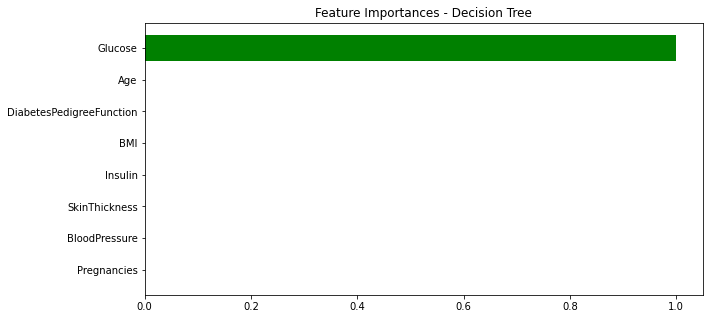

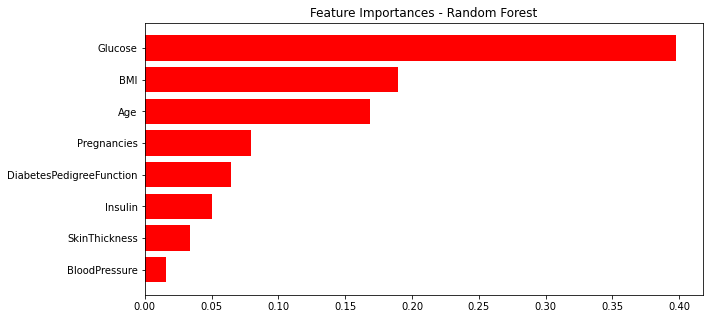

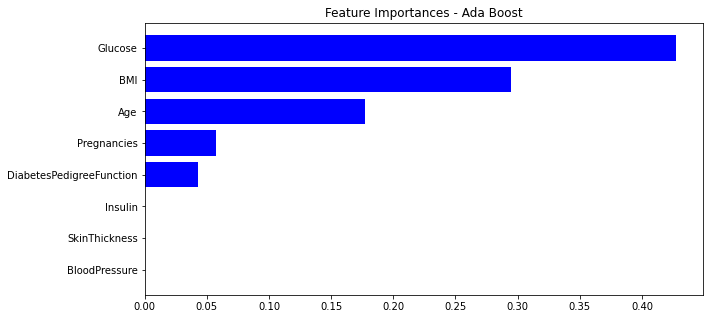

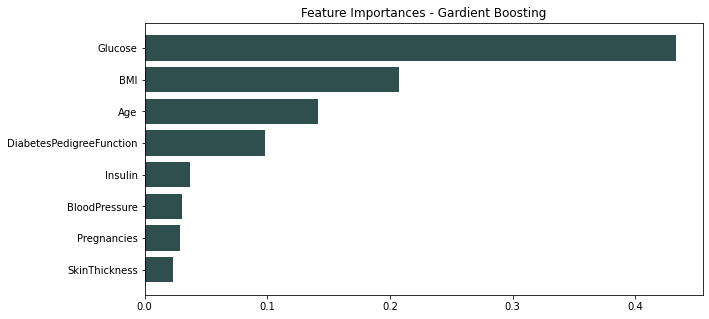

In [410]:
colors = ['green', 'red', 'blue', 'darkslategray']
for i, label in zip(range(len(dataframes)), labels_features):
  importances = dataframes[i].sort_values(by='Importances')['Importances']
  columns = dataframes[i].sort_values(by='Importances').index
  plt.figure(figsize=[10, 5])
  plt.barh(columns, importances, align='center', color=colors[i])
  plt.title(f'Feature Importances - {label}')
  plt.show()
